In [23]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Layer, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import  Adam
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
import os


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, fill_mode='nearest')

train_dir = "/Users/rushikesh/Desktop/Jay/vscode_foml/project/facedata/"
target_size = (224,224)
batch_size = 32

train_generators = train_datagen.flow_from_directory(train_dir, target_size=target_size, batch_size=batch_size,class_mode='categorical')

Found 1600 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generators.class_indices),activation='sigmoid'))

model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    22,151,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,530,498 (85.95 MB)

 Trainable params: 22,530,498 (85.95 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

In [6]:
hist = model.fit(train_generators, epochs=7)

Epoch 1/7


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.5155 - loss: 0.9179
Epoch 2/7
50/50 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.8363 - loss: 0.3958
Epoch 3/7
50/50 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.8336 - loss: 0.4083
Epoch 4/7
50/50 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.9237 - loss: 0.2549
Epoch 5/7
50/50 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9273 - loss: 0.1858
Epoch 6/7
50/50 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.9042 - loss: 0.2535
Epoch 7/7
50/50 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.9448 - loss: 0.1807


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


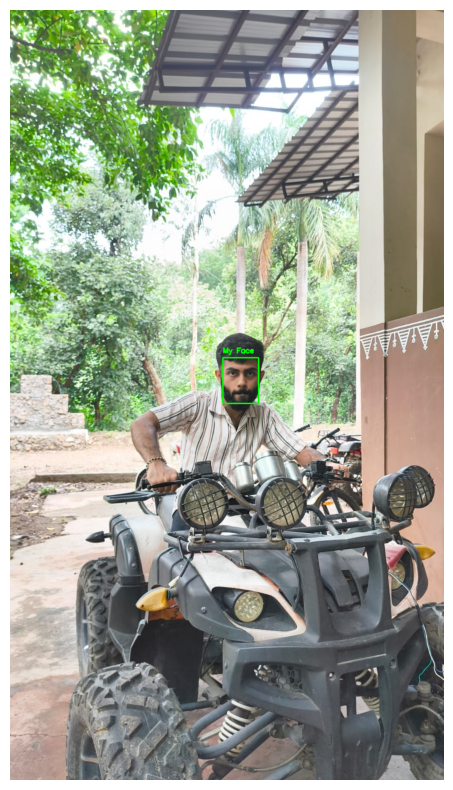

In [16]:
from mtcnn import MTCNN
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Load your pre-trained face classification model

# Initialize the MTCNN detector
detector = MTCNN()

def show_annotated_faces(image_path):
    # Load the image
    image = Image.open(image_path)
    image_rgb = image.convert('RGB')  # Ensure RGB format for face detection
    image_array = np.array(image_rgb)
  
    # Detect faces
    faces = detector.detect_faces(image_array)
    
    # Convert image to OpenCV format for bounding box drawing
    image_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    
    for i, face in enumerate(faces):
        x, y, width, height = face['box']
        
        # Crop each detected face
        face_crop = image_array[y:y+height, x:x+width]
        face_image = Image.fromarray(face_crop).resize((224, 224))  # Resize to model's input size
        
        # Preprocess the face image for prediction
        face_array = img_to_array(face_image) / 255.0  # Scale to [0, 1]
        face_array = np.reshape(face_array, (1,224,224,3))  # Add batch dimension
        
        # Predict using the loaded model
        prediction = model.predict(face_array)
        
        # Define the label and color for the bounding box
        if prediction[0][0] > 0.5:  # Assuming output close to 1 means your face
            label = "My Face"
            color = (0, 255, 0)  # Green for your face
        else:
            label = "Other"
            color = (0, 0, 255)  # Red for others

        # Draw bounding box and label on the image
        cv2.rectangle(image_cv, (x, y), (x + width, y + height), color, 2)
        cv2.putText(image_cv, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    # Convert BGR image back to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
    
    # Show the image with matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

# Test with an image
image_path = '/Users/rushikesh/Desktop/Jay/vscode_foml/rushi.jpeg'
show_annotated_faces(image_path)


In [21]:
def make_embedding():
    inp = Input(shape = (224,224,3),name='input_image')

    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)

    return Model(inputs=[inp] , outputs=[d1], name='embedding')

In [22]:
siam_model = make_embedding()
siam_model.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 215, 215, 64)   │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 108, 108, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 102, 102, 128)  │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 51, 51, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 21, 21, 256)    │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 112896)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │   462,426,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 463,633,728 (1.73 GB)

 Trainable params: 463,633,728 (1.73 GB)

 Non-trainable params: 0 (0.00 B)

In [24]:
class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()

    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [25]:
def make_siamese_model():

    input_image = Input(name='input_img', shape=(224,224,3))
    validation_img =  Input(name='validation_img', shape=(224,224,3))

    siam_layer = L1Dist()
    siam_layer._name = 'distance'
    distances = siam_layer(siam_model(input_image, siam_model(validation_img)))

    classifier = Dense(1, activation='sigmoid')(distances)

    return Model(inputs=[input_image, validation_img], outputs= classifier, name='SiameseNetwork')

In [26]:
#setting loss functions
binary_cross_loss = tf.losses.BinaryCrossentropy()
opt = tf.keras.optimizers.Adam(1e-4)

def train_step(batch):
    with tf.GradientTape() as tape:
        X = batch[:2]
        y = batch[2]

        yhat = siam_model(X, training=True)
        loss = binary_cross_loss(y, yhat)
    
    grad = tape.gradient(loss, siam_model.trainable_variables)

    opt.apply_gradients(zip(grad, siam_model.trainable_variables))

    return loss

In [27]:
def train(data, epochs):
    for epoch in range(1,epochs):
        print('\n Epoch {}/{}'.format(epoch,epochs))
        progbar = tf.keras.utils.Progbar(len(data))

        for idx, batch in enumerate(data):
            train_step(batch)
            progbar.update(idx+1)

In [29]:
siamese_network = make_siamese_model()
siamese_network.summary()

TypeError: Exception encountered when calling Functional.call().

[1mFunctional.compute_output_spec() got multiple values for argument 'training'[0m

Arguments received by Functional.call():
  • args=('<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=input_img>', ['<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_168>'])
  • kwargs={'training': ['<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, name=keras_tensor_168>']}